# **TTI109 - Estatística**
# **Laboratório 12 - Correlação e Regressão**

Nessa aula vamos aprender a:

* Correlação Linear
* Coeficiente de Correlação (Populacional e Amostral)
* Causalidade e Correlacionamento
* Equações de Regressão e Previsões


### **Correlação**

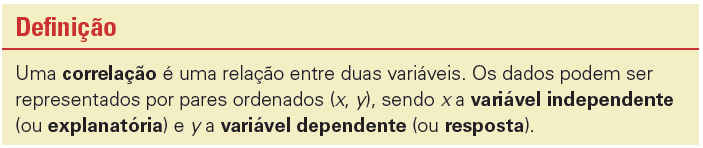


### **Coeficiente de Correlação Linear**

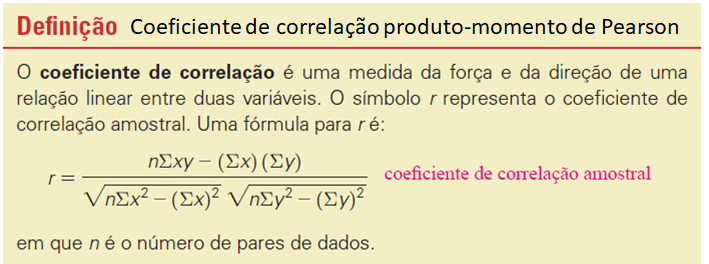

### **Exercício 1**

Um economista quer determinar se existe relação linear entre o produto interno bruto (PIB, em trilhões de dólares) de países e as respectivas emissões de dióxido de carbono ($CO_2$, em milhões de toneladas métricas). Os dados encontram-se nas variáveis *PIB* e $CO_2$. 

Calcule o coeficiente de correlação e interprete o resultado no contexto dos dados.

| PIB (em trilhões de dólares), x | Emissões de $CO_2$ (em milhões de toneladas métricas), y |
|:---:|:---:|
|1,7 | 552,6 |
|1,2 | 462,3 |
|2,5 | 475,4 |
|2,8 | 374,3 |
|3,6 | 748,5 |
|2,2 | 400,9 |
|0,8 | 253,0 |
|1,5 | 318,6 |
|2,4 | 496,8 |
|5,9 | 1.180,6 |

**Cria uma variável do tipo tupla que armazena o coeficiente de correlação (1º elemento) e o p-valor (2º elemento), usado para testes de hipótese:**
```Python
    r, p_valor = stats.pearsonr(PIB, CO2)
```


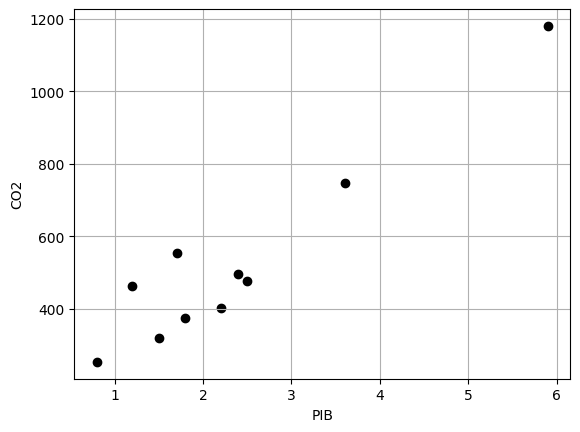

Coeficiente de correlação: 0.95
P-valor: 0.000027


In [8]:
# Importa as bibliotecas
# !pip install matplotlib
# !pip install scipy
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn
# !pip install statsmodels
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Dados
PIB = [1.7, 1.2, 2.5, 1.8, 3.6, 2.2, 0.8, 1.5, 2.4, 5.9]
CO2 = [552.6, 462.3, 475.4, 374.3, 748.3, 400.9, 253.0, 318.6, 496.8, 1180.6]
r, p_valor = stats.pearsonr(PIB, CO2)

# Diagrama de dispersão
plt.scatter(PIB, CO2, c='black')
plt.xlabel('PIB')
plt.ylabel('CO2')
plt.grid()
plt.show()

# Cálculo do coeficiente de correlação usando a biblioteca SciPy
# Tupla desencapsulada contendo o coeficiente de correlação (1º elemento) e o p-valor (2º elemento), usado para testes de hipótese
r, p_valor = stats.pearsonr(PIB, CO2)

# Imprime
print(f'Coeficiente de correlação: {r:.2f}')
print(f'P-valor: {p_valor:.6f}')



### **Teste *t* para coeficiente de correlação populacional $\rho$**

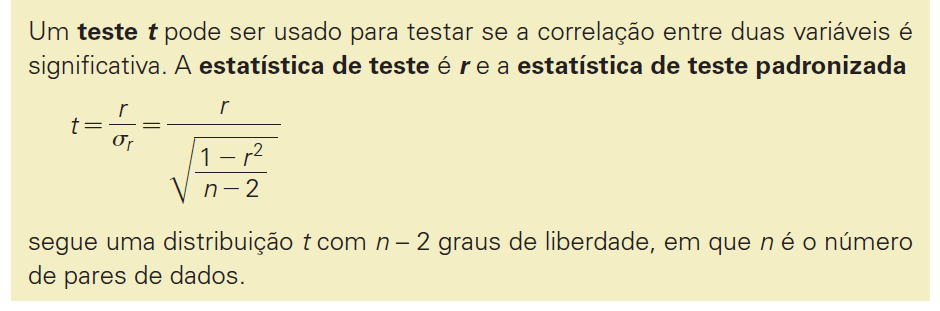

### **Exercício 2**

No **Exercício 1**, empregamos 10 pares de dados para encontrar $r\approx 0,912$. 

Vamos testar a significância desse coeficiente de correlação, usando $\alpha = 0,05$.

In [13]:
# Cálculo do coeficiente de correlação
a = 0.05
n = 10
# t = r * ((n - 2) ** 0.5) / ((1 - r ** 2) ** 0.5)
# print(f'T: {t:.2f}')

# H0: rho = 0   --> Não há correlação significativa
# H1: rho != 0  --> Correlação significativa


# Valores
# t_alfa = stats.t.ppf(1 - a / 2, df=n - 2)
# print(f'T_alfa: {t_alfa:.2f}')

# Se t está na região de rejeição, então rejeitar H0. 
# Caso contrário, não rejeitar H0.
# print(f'Região de rejeição: [{-t_alfa:.2f}, {t_alfa:.2f}]')
# print("Rejeitar H0") if t < -t_alfa or t > t_alfa else print('Não rejeitar H0')
if p_valor < a:
    print("Rejeitar H0")
else:
    print("Não rejeitar H0")



Rejeitar H0


### **Regressão Linear**

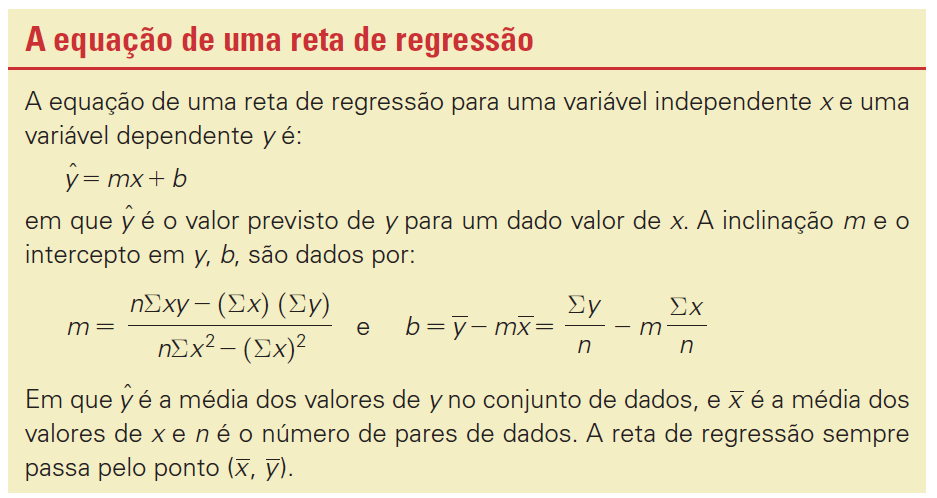

### **Exemplo de Regressão Linear**

Determine a equação da reta de regressão para os dados do produto interno bruto e emissão de dióxido de carbono usados no **Exercício 1**.

**Biblioteca para uso da regrassão linear:**
```Python
    from sklearn.linear_model import LinearRegression
```

O comando `pip install scikit-learn` instala a biblioteca, caso ainda não esteja disponível.

**Cria uma instância do modelo de regressão linear e a armazena na variável `regressao_CO2`. Esse objeto será usado para ajustar o modelo aos dados:**
```Python
    regressao_CO2 = LinearRegression()
```

**Código para o cálculo da reta de regressão:**
```Python
    regressao_CO2.fit(np.array(PIB).reshape(-1,1), np.array(CO2).reshape(-1,1))
```
* `np.array(PIB).reshape(-1,1)`: Converte a lista `PIB` em um array NumPy e a remodela para uma matriz coluna, com `-1` indicando que o número de linhas deve ser inferido automaticamente. Isso é necessário porque o método `fit` espera uma matriz 2D.
* `np.array(CO2).reshape(-1,1)`: Faz o mesmo para a lista `CO2`.
* `regressao_CO2.fit(X, y)`: Ajusta o modelo de regressão linear aos dados, onde `X` é a variável independente (PIB) e `y` é a variável dependente (CO₂).

**Extração dos Coeficientes da regressão:**

```Python
    inclinacao = regressao_CO2.coef_[0][0]
    intercepto = regressao_CO2.intercept_[0]
```

* `regressao_CO2.coef_`: Atributo que contém os coeficientes (inclinações) do modelo ajustado. Como estamos trabalhando com uma única variável independente, será um array 2D com um único valor. O `[0][0]` é usado para extrair esse valor.
* `inclinacao`: Armazena o coeficiente angular (a inclinação) da reta de regressão.
* `regressao_CO2.intercept_`: Atributo que contém o intercepto (coeficiente linear) do modelo. O `[0]` é usado para extrair o valor do array.
* `intercepto`: Armazena o coeficiente linear da reta de regressão.


Reta de regressao: 166.900x + 115.725


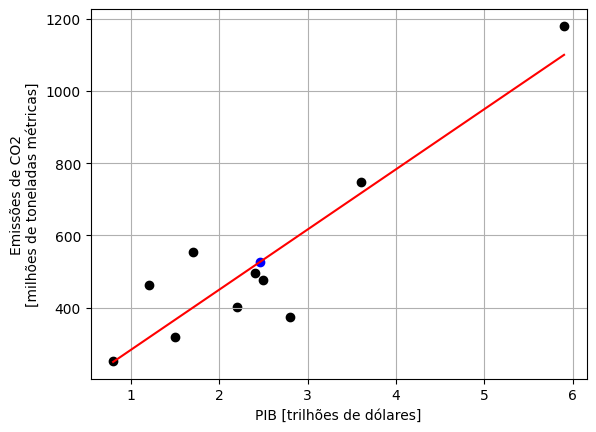

In [11]:
# Importa a biblioteca
# pip install scikit-learn
from sklearn.linear_model import LinearRegression
import numpy as np

# Dados recuperados do Exercício 1
PIB = [1.7, 1.2, 2.5, 2.8, 3.6, 2.2, 0.8, 1.5, 2.4, 5.9]
CO2 = [552.6, 462.3, 475.4, 374.3, 748.5, 400.9, 253.0, 318.6, 496.8, 1180.6]

# Diagrama de dispersão
plt.scatter(PIB, CO2, c='black')
plt.xlabel('PIB [trilhões de dólares]')
plt.ylabel('Emissões de CO2\n[milhões de toneladas métricas]')
plt.grid()

# Criação do objeto regressão linear 
regressao_CO2 = LinearRegression()

# Cálculo da reta de regressão
regressao_CO2.fit(np.array(PIB).reshape(-1,1), np.array(CO2).reshape(-1,1) )

# Exibição dos coeficientes da reta
inclinacao = regressao_CO2.coef_[0][0]
intercepto = regressao_CO2.intercept_[0]
print(f'Reta de regressao: {inclinacao:.3f}x + {intercepto:.3f}')

# Exibindo a reta de regressão
x = np.linspace(min(PIB), max(PIB), 50).reshape(-1,1)
y_previsto = regressao_CO2.predict(x)
plt.plot(x, y_previsto, c='red')
plt.scatter(np.array(PIB).mean(), np.array(CO2).mean(), c='blue')